In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import pandas as pd

from src import fetch_bucketed_from_bitmex, preprocess, evaluate, train_linear, train_lstm

input_dir = 'cache_input'
model_dir = 'cache_model'
output_dir = 'cache_output'

# Crawling the Dataset

In [2]:
df = fetch_bucketed_from_bitmex('XBTZ19', '5m')

In [2]:
df = pd.read_csv('cache_crawler/XBTZ19_1m.csv', index_col="timestamp", parse_dates=True)

# Feature Engineering

In [3]:
preprocess(df, input_dir)

In [4]:
pd.read_csv('cache_input/trai_x.csv', index_col="timestamp", parse_dates=True).describe()

,vwap_log,high_log,low_log,close_log,trades_log,home_notional_log,foreign_notional_log,macd_12_26,macd_sign_12_26,macd_diff_12_26,rsi_14
count,80377.000000,80377.000000,80377.000000,80377.000000,80377.000000,80377.000000,80377.000000,80377.000000,80377.000000,80377.000000,80377.000000
mean,0.136863,0.137884,0.135736,0.136849,0.064248,0.109246,0.089929,0.012686,0.013482,0.000035,0.016712
std,1.172650,1.172617,1.172701,1.172658,0.987527,1.027184,0.983065,1.193733,1.193332,1.196764,0.963065
min,-2.842222,-2.842656,-2.841269,-2.842042,-1.748224,-0.980727,-2.261244,-31.827248,-26.022112,-45.806102,-2.074483
25%,-0.852700,-0.852356,-0.854487,-0.852422,-0.528340,-0.811614,-0.153075,-0.378226,-0.379549,-0.450397,-0.726118
50%,0.195146,0.198197,0.193175,0.195340,0.135228,-0.129955,0.389646,0.028294,0.030220,-0.003422,0.007686
75%,1.101629,1.100805,1.102957,1.102454,0.777443,0.779585,0.737840,0.444700,0.448149,0.432472,0.757729
max,3.249026,3.280120,3.251894,3.288715,3.428465,6.377705,2.188618,13.462958,12.840783,20.598709,2.112382


# Training

### Benchmark: Linear Model

In [5]:
train_linear(
    input_dir=input_dir,
    output_dir=output_dir,
    model_dir=model_dir,
    hidden_dim=64,
    lr=1e-3,
    batch_size=1024,
    n_epochs=16,
)

Using device cpu.
| epoch | trai loss | vali loss | time/s |
| ----: | --------- | --------- | -----: |
|     0 | 1.328e+00 | 2.552e-01 |      0 |
|     1 | 6.942e-01 | 1.342e-01 |      0 |
|     2 | 3.034e-01 | 5.068e-02 |      0 |
|     3 | 1.005e-01 | 1.265e-02 |      0 |
|     4 | 4.191e-02 | 1.100e-02 |      0 |
|     5 | 3.810e-02 | 9.479e-03 |      0 |
|     6 | 3.457e-02 | 8.099e-03 |      0 |
|     7 | 3.136e-02 | 6.891e-03 |      0 |
|     8 | 2.913e-02 | 6.778e-03 |      0 |
|     9 | 2.885e-02 | 6.661e-03 |      0 |
|    10 | 2.855e-02 | 6.540e-03 |      0 |
|    11 | 2.824e-02 | 6.417e-03 |      0 |
|    12 | 2.800e-02 | 6.405e-03 |      0 |
|    13 | 2.797e-02 | 6.391e-03 |      0 |
|    14 | 2.793e-02 | 6.378e-03 |      0 |
|    15 | 2.790e-02 | 6.364e-03 |      0 |
loss of trai is 2.787e-02
loss of vali is 6.364e-03
loss of test is 5.330e-03


### Solution: LSTM Model

In [6]:
train_lstm(
    input_dir=input_dir,
    output_dir=output_dir,
    model_dir=model_dir,
    hidden_dim=64,
    lstm_layers=2,
    dropout=0.1,
    lr=1e-3,
    batch_size=1024,
    n_epochs=4,
)

Using device cpu.
| epoch | trai loss | vali loss | time/s |
| ----: | --------- | --------- | -----: |
|     0 | 6.267e-01 | 4.018e-02 |     46 |
|     1 | 1.074e-01 | 3.517e-02 |     43 |
|     2 | 1.057e-01 | 6.056e-03 |     44 |
|     3 | 3.750e-02 | 1.264e-02 |     43 |
loss of trai is 2.516e-02
loss of vali is 1.262e-02
loss of test is 6.132e-03


# Evaluation

/home/dan/git/udacity-nd009t/capstone/src/evaluator.py:99: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # save


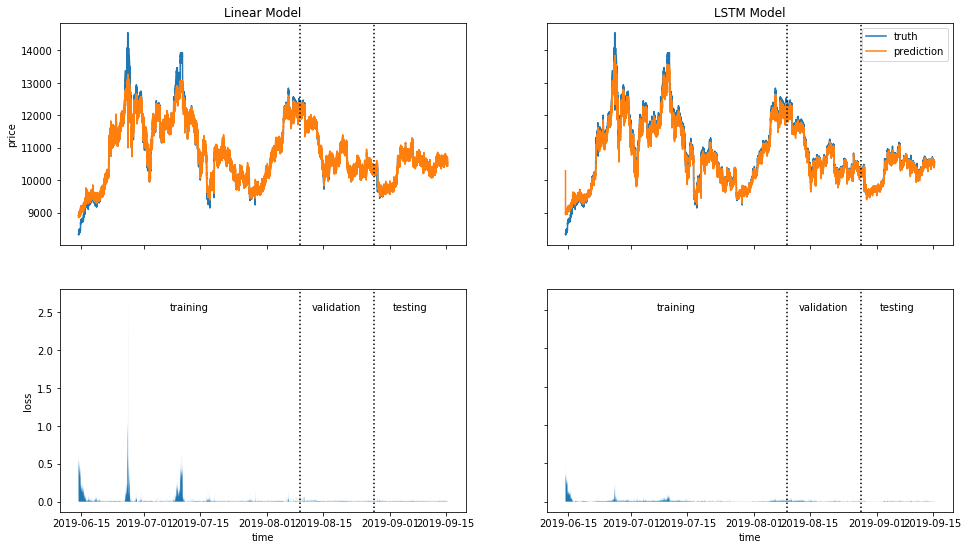

In [12]:
evaluate(input_dir, output_dir)